ASSIGNMENT_2

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


1. Download the dataset:

2. Load the dataset into the tool.

In [115]:
df = pd.read_csv('Housing.csv')

In [116]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [117]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

 Uni-Variate Analysis

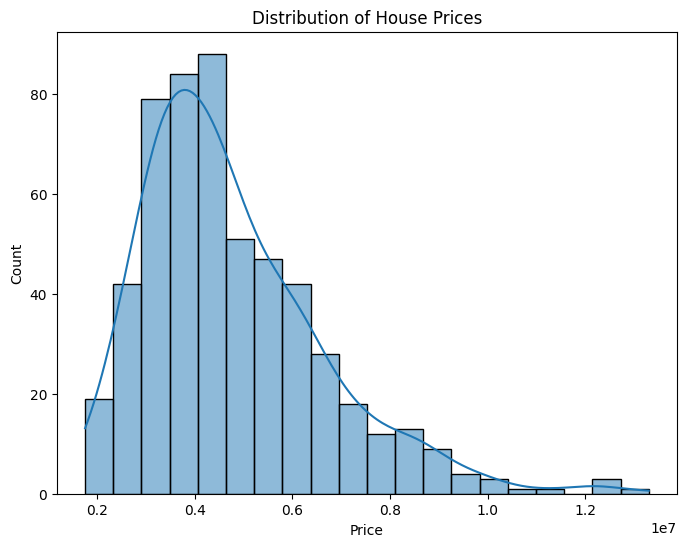

In [118]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Bi-Variate Analysis

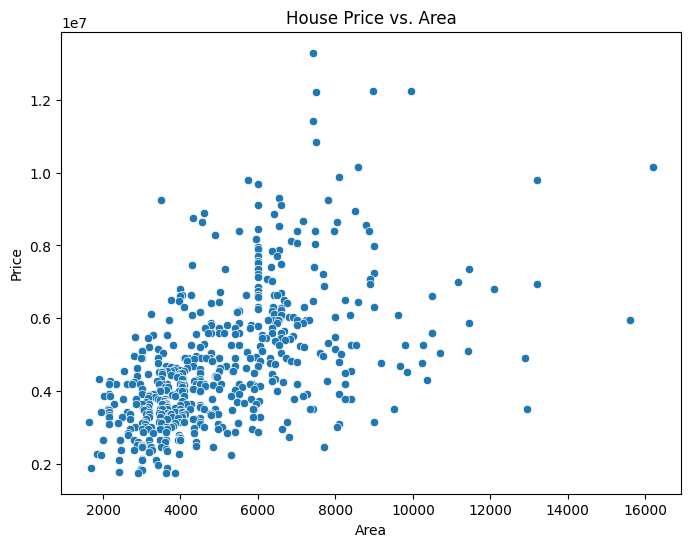

In [119]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('House Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


Multi-Variate Analysis

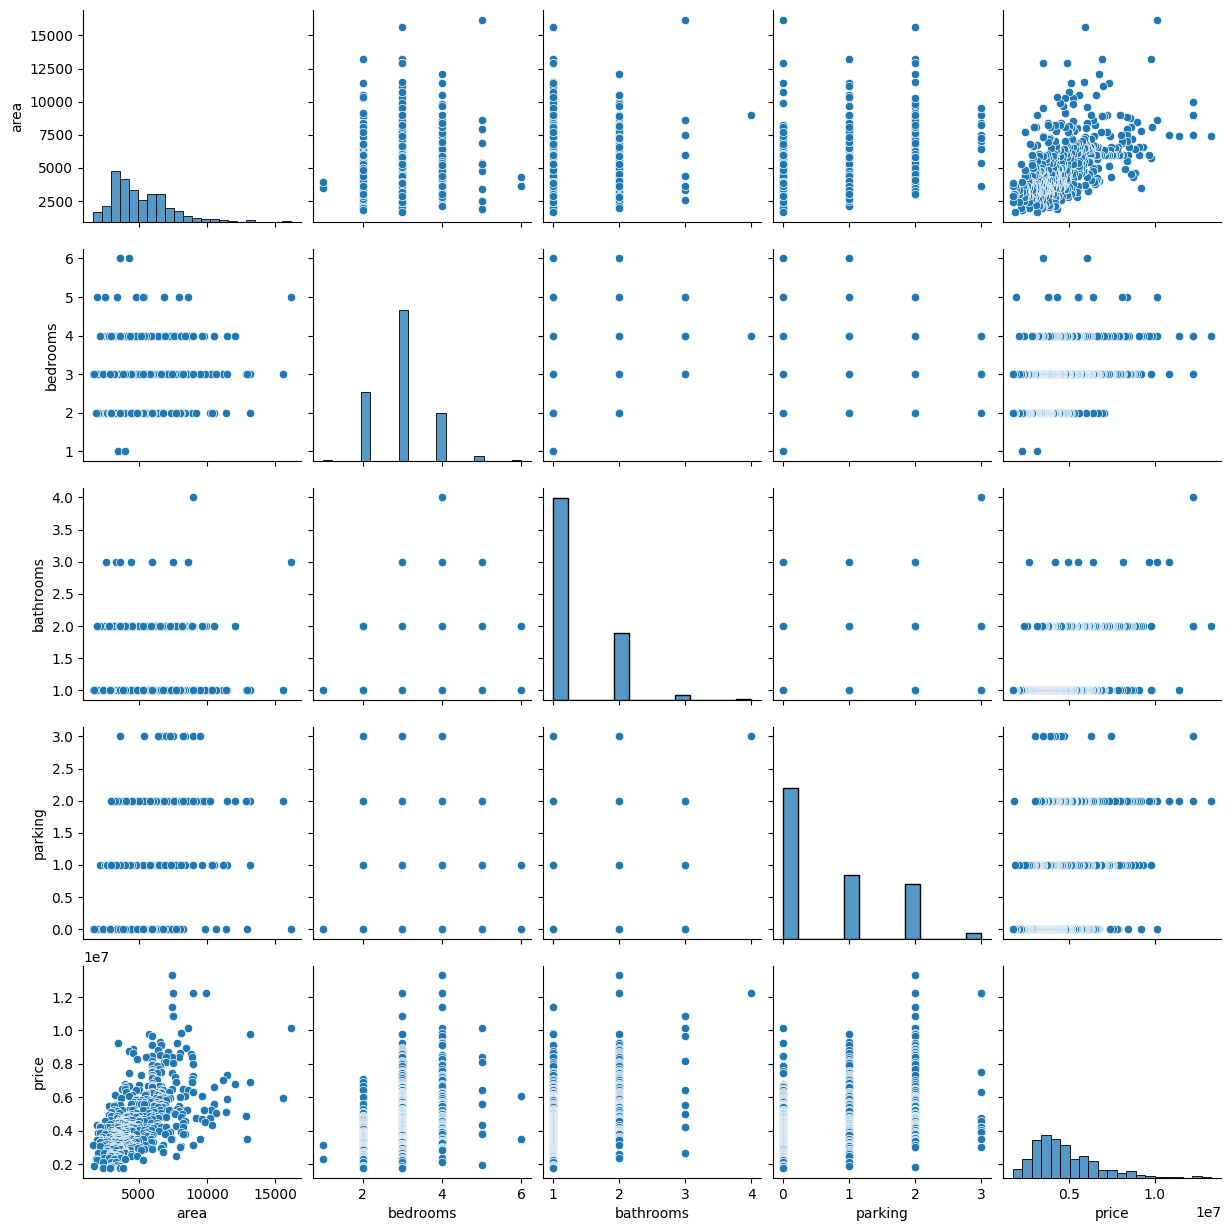

In [120]:
sns.pairplot(df, vars=['area', 'bedrooms', 'bathrooms', 'parking', 'price'])
plt.show()

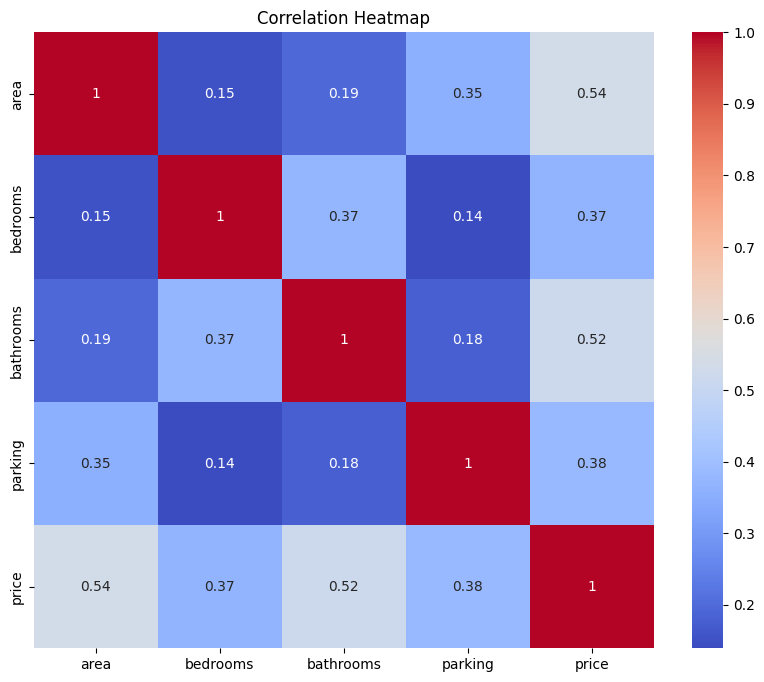

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['area', 'bedrooms', 'bathrooms', 'parking', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

DESCRIPTIVE STATISTICS

In [122]:
df.describe() 

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


HANDLING MISSING VALUES


In [123]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

It is founded that there are no null values in the given dataset.
So there is no need of handling the missing values.

In [124]:
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

In [125]:

#Check for categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
# Perform encoding using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [126]:
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded_df], axis=1)

In [127]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [128]:

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [129]:

# Step 4: Build the linear regression model
model = LinearRegression()

# Step 5: Train the model
model.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred = model.predict(X_test)
print(y_pred)

[5258925.99541617 6718130.9354869  3206390.61078682 4746637.3331803
 3417109.03607652 3688532.64426649 5821903.98698924 5998970.73111102
 2722897.05312342 2604646.13552248 9123702.9357661  2886443.41171829
 3134456.01977447 3463046.6881216  3883767.03358578 5205836.27646807
 3094402.64909843 4934276.69762259 4587021.22230965 3701879.6875537
 5265993.32138883 5568826.19292356 2814395.25514759 4346622.371208
 5539146.03442005 7202583.0289495  3437632.76421889 5398110.73586203
 7895446.45813403 3480358.76570768 6035959.57685419 3410164.9814662
 6869572.93591009 4358864.08644594 3698347.63676932 5928918.32132236
 5081631.13271761 4577887.63555209 3171570.78992645 4677498.10467741
 4756189.98912228 3605638.17867785 6697906.89153723 4109495.48286034
 3891480.09958185 4403692.57341579 6862300.25259125 4185359.05934611
 3926970.47292875 3593016.75148019 7398009.03389134 2878316.85451255
 4510481.38308516 4613013.59120911 3898129.75429438 2657734.25089036
 7011781.20542858 3000159.43001254 4414

In [131]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1837637189871.7036
Mean Absolute Error: 988116.1632405713
R-squared: 0.6364404686639469
